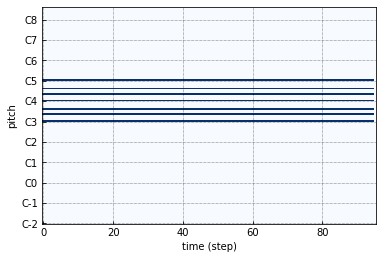

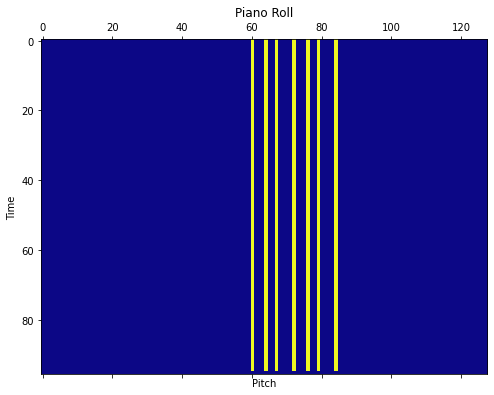

In [1]:
# d6592
# Load midi to piano roll / numpy? Yes please
import numpy as np
from pypianoroll import Multitrack, Track
import pypianoroll as pr
%matplotlib inline
import matplotlib.pyplot as plt

def display_pianoroll(roll, title='Piano Roll'):
    plt.figure(figsize=(8,6))
    plt.matshow(roll, fignum=1, aspect='auto', cmap='plasma')
    plt.xlabel('Pitch')
    plt.ylabel('Time')
    plt.title(title)
    plt.show()

# Create a pianoroll matrix, where the first and second axes represent time and pitch, respectively
# assign a C major chord to the pianoroll

pianoroll = np.zeros((96, 128))  # (time, pitch)
C_maj = [60, 64, 67, 72, 76, 79, 84]
pianoroll[0:95, C_maj] = 100

# Create a `pypianoroll.Track` instance
track = Track(pianoroll=pianoroll, program=0, is_drum=False,
              name='my awesome piano')

# Plot the pianoroll
fig, ax = track.plot()
plt.show()
display_pianoroll(pianoroll)



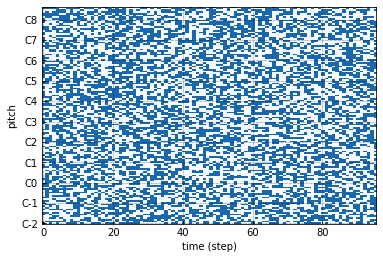

In [11]:
digits = np.random.randint(0,2,size=(96, 128))
digits *= 100
t = Track(pianoroll=digits, program=0, is_drum=False, name='Dumb test')
T = Multitrack(tracks=[t], tempo=120.0)
fig, ax = t.plot()
plt.show()

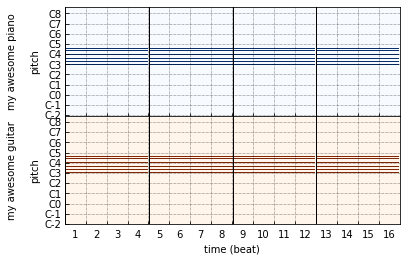

In [2]:
# Extend the pianoroll to demonstrate the usage of down beat array
track.pianoroll = np.tile(track.pianoroll, (4, 1))
downbeats = [0, 96, 192, 288]

# Copy the track to demonstrate the usage of `pypianoroll.Multitrack`
another_track = track.copy()
another_track.program = 24
another_track.name = 'my awesome guitar'

# Create a `pypianoroll.Multitrack` instance
multitrack = Multitrack(tracks=[track, another_track], tempo=120.0,
                        downbeat=[0, 96, 192, 288], beat_resolution=24)

# Plot the multitrack pianoroll
fig, axs = multitrack.plot()
plt.show()

In [3]:
# Write the `pypianoroll.Multitrack` instance to a MIDI file
multitrack.write('./test.mid')

Roll length of res_24 7488
/Users/James/PycharmProjects/deep-learning/music/lstm-generation-bach/midi/1080-c01.mid


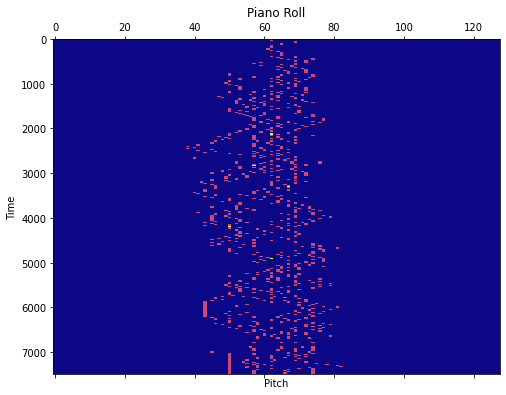

In [12]:
import os
head = '/Users/James/PycharmProjects/deep-learning/music/lstm-generation-bach'
midi_dir = os.path.join(head, 'midi')

fname = os.path.join(midi_dir, '1080-c01.mid')

bach = Multitrack(fname, beat_resolution=24)
bach.trim_trailing_silence()
bach.binarize()
roll = bach.get_merged_pianoroll()
print('Roll length of res_24', roll.shape[0])
display_pianoroll(roll)

print(fname)
#bach = Multitrack(fname, beat_resolution=8)
#bach.trim_trailing_silence()
#bach.binarize()
#roll = bach.get_merged_pianoroll()
#print('Roll length of res_8', roll.shape[0])
#display_pianoroll(roll)


# Save the edited version
roll *= 100
t = Track(pianoroll=roll, program=0, is_drum=False, name='ai gen pianoroll')
mt = Multitrack(tracks=[t], tempo=120.0)
mt.write('test.mid')

In [12]:
fname = os.path.join(midi_dir, 'random.mid')
T.write(fname)

In [5]:
merged_roll = bach.get_merged_pianoroll()  # This i# s the file.

In [ ]:
from keras.models import Sequential
from keras import layers

model = Sequential()
model.add(layers.ConvLSTM2D)
